# Introducción

# Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import plotly.express as px

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

# Listado de viviendas

In [2]:
print(os.listdir("input"))

['calendar.csv', 'listings.csv', 'listings_details.csv', 'neighbourhoods.csv', 'neighbourhoods.geojson', 'reviews.csv']


In [3]:
listings = pd.read_csv("input/listings.csv", index_col= "id")
listings_details = pd.read_csv("input/listings_details.csv", index_col= "id", low_memory=False)

calendar = pd.read_csv("input/calendar.csv", parse_dates=['date'], index_col=['listing_id'])
reviews_details = pd.read_csv("input/reviews.csv", parse_dates=['date'])

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [6]:
listings.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
701230,Authentic Bright Artist's Loft,3587917,Darby,NaN,High Park North,43.65873,-79.45336,Entire home/apt,100,28,15,2018-07-31,0.13,1,0,0,NaN
40456,Downtown- King Size Bed and Parking,174063,Denis,NaN,South Parkdale,43.63539,-79.44010,Entire home/apt,150,31,114,2022-01-29,0.74,4,313,0,NaN
1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.08,1,0,0,NaN
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,104,180,169,2013-08-27,1.02,2,365,0,NaN
26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,NaN,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,145,28,41,2021-01-31,0.28,3,221,0,NaN


In [7]:
listings_details.head()

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,https://www.airbnb.com/rooms/1419,20230309202131,2023-03-10,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone']",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire home,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Wifi"", ""Kitchen"", ""First aid kit"", ""Dryer"", ...",$469.00,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2023-03-10,7,0,0,2015-07-19,2017-12-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
8077,https://www.airbnb.com/rooms/8077,20230309202131,2023-03-10,city scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,3.0,"['email', 'phone']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Wifi"", ""Gym"", ""Pool"", ""Free parking on premi...",$104.00,180,365,180,180,365,365,180.0,365.0,NaN,t,30,60,90,365,2023-03-10,169,0,0,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,t,2,1,1,0,1.02
26654,https://www.airbnb.com/rooms/26654,20230309202131,2023-03-10,city scrape,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,https://www.airbnb.com/users/show/113345,Adela,2010-04-25,"Toronto, Canada",Welcome to Toronto! \r\n\r\nAfter our first me...,within a day,77%,25%,f,https://a0.muscache.com/im/users/113345/profil...,https://a0.muscache.com/im/users/113345/profil...,Entertainment District,3.0,8.0,"['email', 'phone', 'work_email']",t,t,"Toronto, Ontario, Canada",Waterfront Communities-The Island,NaN,43.64608,-79.39032,Entire condo,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Oven"", ""Wifi"", ""Dishwasher"", ""Central air co...",$145.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,0,

In [8]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17997 entries, 701230 to 842820235890657160
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            17995 non-null  object 
 1   host_id                         17997 non-null  int64  
 2   host_name                       17995 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   17997 non-null  object 
 5   latitude                        17997 non-null  float64
 6   longitude                       17997 non-null  float64
 7   room_type                       17997 non-null  object 
 8   price                           17997 non-null  int64  
 9   minimum_nights                  17997 non-null  int64  
 10  number_of_reviews               17997 non-null  int64  
 11  last_review                     13003 non-null  object 
 12  reviews_per_month  

In [9]:
listings.drop(columns=['neighbourhood_group'],inplace=True, axis=1)

In [10]:
duplicates=listings.duplicated()
num_duplicates=duplicates.sum()
if duplicates.any():
    print("Se han encontrado duplicados en el DataFrame.")
    print('Hay un total de', num_duplicates, 'valores duplicados en el DataFrame.')
else:
    print("No hay duplicados en el DataFrame.")

No hay duplicados en el DataFrame.


In [11]:
listings.isnull().sum()

name                                  2
host_id                               0
host_name                             2
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        4994
reviews_per_month                  4994
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           10089
property_type                         0
accommodates                          0
first_review                       4994
review_scores_value                5128
review_scores_cleanliness          5126
review_scores_location             5129
review_scores_accuracy             5128
review_scores_communication        5128
review_scores_checkin              5128


In [12]:
listings['neighbourhood']=listings['neighbourhood'].str.lower().str.replace("[-|'|/|.]", ' ',regex=True)

In [13]:
listings['District']=None
scarborough=['Agincourt', 'Armadale', 'Bendale', 'Birch Cliff', 'Brown s Corners', 'Clairlea', 'Cliffcrest', 'Cliffside', 'Dorset Park', 'Eglinton East', 'Golden Mile', 'Guildwood', 'Highland Creek', 'Ionview', 'L Amoreaux', 'Malvern', 'Maryvale', 'Milliken', 'Morningside', 'Morningside Heights', 'Oakridge', 'Port Union', 'Rouge', 'Scarborough', 'City Centre', 'Scarborough Junction', 'Scarborough Village', 'Steeles', 'Tam O Shanter', 'Sullivan', 'West Hill', 'West Rouge', 'Wexford', 'Woburn']
etobicoke=['Alderwood', 'Clairville', 'Eatonville', 'The Elms', 'Eringate', 'Centennial', 'West Deane', 'Humber Heights', 'Westmount', 'Humber Valley Village', 'Islington', 'City Centre West', 'Humberwood', 'Kingsview Village', 'The Kingsway', 'Long Branch', 'Markland Wood', 'Mimico', 'New Toronto', 'Princess Gardens', 'Rexdale', 'Richview', 'The Queensway', 'Humber Bay', 'Smithfield', 'Thistletown']
york=['Baby Point', 'Fairbank', 'Humewood', 'Cedarvale', 'Lambton', 'Little Jamaica', 'Mount Dennis', 'Oakwood', 'Vaughan', 'Old Mill', 'Rockcliffe', 'Smythe', 'Silverthorn', 'Tichester', 'Weston']
east_york=['Bermondsey', 'Crescent Town', 'Governor s Bridge', 'Leaside', 'O Connor', 'Parkview', 'Old East York', 'Pape Village', 'Thorncliffe Park']
north_york=['Amesbury', 'Armour Heights', 'Bathurst Manor', 'Bayview Village', 'Bayview Woods', 'Steeles', 'Bermondsey', 'Bridle Path', 'Clanton Park', 'Don Mills', 'Don Valley Village', 'Downsview', 'Flemingdon Park', 'Glenfield Jane Heights', 'Glen Park', 'Graydon Hall', 'Henry Farm', 'Hillcrest Village', 'Hoggs Hollow', 'Humber Summit', 'Humbermede', 'Jane and Finch', 'Lansing', 'Lawrence Heights', 'Lawrence Manor', 'Maple Leaf', 'Newtonbrook', 'North York City Centre', 'Parkway Forest', 'Parkwoods', 'Pelmo Park', 'Humberlea', 'Pleasant View', 'Victoria Village', 'Westminster', 'Branson', 'Willowdale', 'York Mills', 'York University Heights']

districts={1:scarborough,2:etobicoke,3:york,4:east_york,5:north_york}
names={1:'Scarborough',2:'Etobicoke',3:'York',4:'East York',5:'North York'}

for i in districts.keys():
    for word in districts[i]:
        word=word.lower()
        neighbourhood = listings['neighbourhood'].apply(lambda x: word in x.lower())
        listings.loc[neighbourhood, 'District'] = names[i]

listings.loc[listings['District'].isnull(),'District']='Toronto'
listings['neighbourhood']=listings['neighbourhood'].str.title()

# Análisis exploratorio

### Vecindario

In [14]:
numero_d=listings['District'].value_counts().sort_values(ascending=False).reset_index()
numero_d['percent']=None
for i in numero_d.index:
    numero_d.loc[i,'percent']=(numero_d.loc[i,'count']*100)/numero_d['count'].sum()
numero_d['percent']=numero_d['percent'].apply(lambda x: np.round(x,2))
numero_d

,District,count,percent
0,Toronto,12457,69.22
1,North York,2402,13.35
2,Scarborough,1429,7.94
3,Etobicoke,982,5.46
4,York,507,2.82
5,East York,220,1.22


In [ ]:
numero_d=listings['District'].value_counts().sort_values(ascending=True).reset_index()
fig=px.bar(x=numero_d['count'], y=numero_d['District'], orientation='h', color=numero_d['District'],title = "Número de ofertas por área", template= "plotly_dark",color_discrete_sequence=['#3944BC','#757C88','#281E5D','#1520A6','#022D36','#1F456E'])
fig.update_layout(
    xaxis_title="Número de ofertas",
    yaxis_title="Área"
)
fig.show()

In [16]:
avg_price_d=listings.groupby('District')[['price','minimum_nights']].mean().sort_values(by='price', ascending=False).reset_index()
avg_price_d['total_price']=None
for i in avg_price_d.index:
    avg_price_d.loc[i,'total_price']=avg_price_d.loc[i,'price']*np.ceil(avg_price_d.loc[i,'minimum_nights'])

avg_price_d['minimum_nights']=avg_price_d['minimum_nights'].apply(lambda x: np.ceil(x))
avg_price_d['price']=avg_price_d['price'].apply(lambda x: np.round(x,2))
avg_price_d['total_price']=avg_price_d['total_price'].apply(lambda x: np.round(x,2))
avg_price_d

,District,price,minimum_nights,total_price
0,Toronto,201.33,28.0,5637.19
1,Etobicoke,151.20,25.0,3779.91
2,East York,148.95,24.0,3574.69
3,York,146.38,28.0,4098.60
4,North York,130.52,28.0,3654.70
5,Scarborough,107.83,25.0,2695.63


In [ ]:
avg_price_d=avg_price_d.sort_values(by='total_price', ascending=True)
fig = px.line(avg_price_d, x='District', y="minimum_nights", hover_data=['total_price'], template= "plotly_dark", title = "Precio total medio por área en Toronto")
fig.add_bar(x=avg_price_d['District'], y=avg_price_d['price'], name='Promedio precio mínimo', marker_color=['#B22222','#960018','#8D021F','#D21F3C','#722F37','#D9381E'])
fig.update_layout(
    yaxis_title="Precio mínimo",
    xaxis_title="Área",
)
fig.show()

In [18]:
numero_v=listings.groupby('District')['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()
numero_v['percent']=None
for i in numero_v.index:
    numero_v.loc[i,'percent']=(numero_v.loc[i,'count']*100)/numero_v['count'].sum()
    
numero_v['percent']=numero_v['percent'].apply(lambda x: np.round(x,2))
numero_v

,District,neighbourhood,count,percent
0,Toronto,Waterfront Communities The Island,3096,17.20
1,Toronto,Niagara,722,4.01
2,Toronto,Kensington Chinatown,678,3.77
3,Toronto,Annex,599,3.33
4,Toronto,Trinity Bellwoods,523,2.91
...,...,...,...,...
135,Toronto,Forest Hill North,17,0.09
136,North York,Bridle Path Sunnybrook York Mills,17,0.09
137,North York,Humber Summit,17,0.09
138,Toronto,Kingsway South,12,0.07


In [ ]:
numero_v_top5=numero_v[:5].copy().sort_values(by='count',ascending=True)
fig=px.bar(x=numero_v_top5['count'], y=numero_v_top5['neighbourhood'], orientation='h', color=numero_v_top5['District'],title = "Número de ofertas por vecindario", template= "plotly_dark",color_discrete_sequence=['#3944BC','#757C88','#281E5D','#1520A6','#022D36','#1F456E'])
fig.update_layout(
    xaxis_title="Número de ofertas",
    yaxis_title="Vecindarios con más ofertas"
)
fig.show()

In [ ]:
numero_v_least5=numero_v[-5:].copy().sort_values(by='count',ascending=False)
fig=px.bar(x=numero_v_least5['count'], y=numero_v_least5['neighbourhood'], orientation='h', color=numero_v_least5['District'],title = "Número de ofertas por vecindario", template= "plotly_dark", color_discrete_sequence=['#3944BC','#757C88','#281E5D','#1520A6','#022D36','#1F456E'])
fig.update_layout(
    xaxis_title="Número de ofertas",
    yaxis_title="Vecindarios con menos ofertas"
)
fig.show()

In [21]:
avg_price_v=listings.groupby(['District','neighbourhood'])[['price','minimum_nights']].mean().sort_values(by='price', ascending=False).reset_index()
avg_price_v['total_price']=None
for i in avg_price_v.index:
    avg_price_v.loc[i,'total_price']=avg_price_v.loc[i,'price']*np.ceil(avg_price_v.loc[i,'minimum_nights'])

avg_price_v['minimum_nights']=avg_price_v['minimum_nights'].apply(lambda x: int(np.ceil(x)))
avg_price_v['price']=avg_price_v['price'].apply(lambda x: np.round(x,2))
avg_price_v['total_price']=avg_price_v['total_price'].apply(lambda x: np.round(x,2))
avg_price_v

,District,neighbourhood,price,minimum_nights,total_price
0,Toronto,Roncesvalles,479.56,24,11509.42
1,Etobicoke,Long Branch,307.55,23,7073.65
2,Toronto,Palmerston Little Italy,302.90,25,7572.41
3,Toronto,Bedford Park Nortown,300.79,25,7519.87
4,Toronto,Forest Hill South,266.41,26,6926.56
...,...,...,...,...,...
135,Scarborough,L Amoreaux,79.07,25,1976.72
136,North York,York University Heights,78.12,25,1953.12
137,North York,Pleasant View,78.11,27,2108.87
138,Toronto,Black Creek,67.65,21,1420.55


In [ ]:
avg_price_v_top5=avg_price_v[:5].copy().sort_values(by='total_price',ascending=False)
fig=px.bar(x=avg_price_v_top5['total_price'], y=avg_price_v_top5['neighbourhood'], orientation='h', color=avg_price_v_top5['District'],title = "Precio total medio de ofertas por vecindario", template= "plotly_dark",color_discrete_sequence=['#3944BC','#757C88','#281E5D','#1520A6','#022D36','#1F456E'],  hover_data={'Promedio precio': avg_price_v_top5['price'], 'Noches mínimas': avg_price_v_top5['minimum_nights']})
fig.update_layout(
    xaxis_title="Precio mínimo total",
    yaxis_title="Vecindarios más caros"
)
fig.show()

In [ ]:
avg_price_v_least5=avg_price_v[-5:].copy().sort_values(by='total_price',ascending=False)
fig=px.bar(x=avg_price_v_least5['total_price'], y=avg_price_v_least5['neighbourhood'], orientation='h', color=avg_price_v_least5['District'],title = "Precio total medio de ofertas por vecindario", template= "plotly_dark", color_discrete_sequence=['#3944BC','#757C88','#281E5D','#1520A6','#022D36','#1F456E'],  hover_data={'Promedio precio': avg_price_v_top5['price'], 'Noches mínimas': avg_price_v_top5['minimum_nights']})
fig.update_layout(
    xaxis_title="Precio mínimo total",
    yaxis_title="Vecindarios más baratos"
)
fig.show()

In [ ]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[43.651070, -79.347015], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

### Tipos de habitaciones

In [ ]:
px.scatter_mapbox(listings, lat='latitude', lon='longitude', size='price', zoom=10, mapbox_style='carto-positron', title='Distribución de ofertas por tipo de habitación en Toronto', template= "plotly_dark", size_max=20, animation_frame='room_type',color_discrete_sequence=['#274490'])

In [26]:
numero_room_d=listings.groupby('District')['room_type']. value_counts().sort_values(ascending=False).reset_index()
numero_room_d['percent']=None
for i in numero_room_d.index:
    numero_room_d.loc[i,'percent']=(numero_room_d.loc[i,'count']*100)/numero_room_d['count'].sum()
numero_room_d['percent']=numero_room_d['percent'].apply(lambda x: np.round(x,2))
numero_room_d

,District,room_type,count,percent
0,Toronto,Entire home/apt,9466,52.60
1,Toronto,Private room,2899,16.11
2,North York,Private room,1293,7.18
3,North York,Entire home/apt,1085,6.03
4,Scarborough,Private room,736,4.09
5,Scarborough,Entire home/apt,670,3.72
6,Etobicoke,Entire home/apt,547,3.04
7,Etobicoke,Private room,429,2.38
8,York,Entire home/apt,287,1.59
9,York,Private room,213,1.18


In [ ]:
fig=px.bar(x=numero_room_d['percent'], y=numero_room_d['District'], color=numero_room_d['room_type'],title = "Tipo de habitaciones por área", template= "plotly_dark",barmode='group',color_discrete_sequence=['#59788E','#960018','#3944BC','#D9381E'])
fig.update_layout(
    xaxis_title="Promedio de tipo de habitaciones",
    yaxis_title="Área"
)
fig.show()

In [28]:
avg_price_r_d=listings.groupby(['District','room_type'])[['price','minimum_nights']].mean().sort_values(by='price', ascending=False).reset_index()
avg_price_r_d['total_price']=None
for i in avg_price_r_d.index:
    avg_price_r_d.loc[i,'total_price']=avg_price_r_d.loc[i,'price']*np.ceil(avg_price_r_d.loc[i,'minimum_nights'])

avg_price_r_d['minimum_nights']=avg_price_r_d['minimum_nights'].apply(lambda x: int(np.ceil(x)))
avg_price_r_d['price']=avg_price_r_d['price'].apply(lambda x: np.round(x,2))
avg_price_r_d['total_price']=avg_price_r_d['total_price'].apply(lambda x: np.round(x,2))
avg_price_r_d

,District,room_type,price,minimum_nights,total_price
0,Toronto,Entire home/apt,229.88,29,6666.44
1,East York,Entire home/apt,210.30,27,5678.10
2,York,Entire home/apt,200.90,32,6428.88
3,North York,Entire home/apt,198.02,30,5940.72
4,Etobicoke,Entire home/apt,177.43,28,4968.13
5,Scarborough,Entire home/apt,149.64,27,4040.37
6,Toronto,Shared room,138.47,24,3323.20
7,Toronto,Hotel room,123.50,28,3458.00
8,Etobicoke,Private room,118.62,21,2491.07
9,Toronto,Private room,110.11,25,2752.85


In [ ]:
fig = px.scatter(data_frame=avg_price_r_d, y='total_price', x='District', size='total_price', color='room_type', hover_data=['room_type','price','minimum_nights'], log_x=False,size_max=60,title="Precio total medio de tipo de habitación por área",template="plotly_dark",color_discrete_sequence=['#59788E','#960018','#D9381E','#3944BC'])
fig.update_layout(
    yaxis_title="Precio mínimo total",
    xaxis_title="Área"
)
fig.show()

### Tipo de propiedad

In [ ]:
px.scatter_mapbox(listings, lat='latitude', lon='longitude', size='price', zoom=10, mapbox_style='carto-positron', title='Distribución de ofertas por tipo de propiedad en Toronto', template= "plotly_dark", size_max=80, animation_frame='property_type',color_discrete_sequence=['#274490'])

In [31]:
numero_prop_d=listings.groupby(['District','room_type'])['property_type']. value_counts().sort_values(ascending=False).reset_index()
numero_prop_d['percent']=None
for i in numero_prop_d.index:
    numero_prop_d.loc[i,'percent']=(numero_prop_d.loc[i,'count']*100)/numero_prop_d['count'].sum()
numero_prop_d['percent']=numero_prop_d['percent'].apply(lambda x: np.round(x,2))
numero_prop_d

,District,room_type,property_type,count,percent
0,Toronto,Entire home/apt,Entire condo,3406,18.93
1,Toronto,Entire home/apt,Entire rental unit,3245,18.03
2,Toronto,Entire home/apt,Entire home,1730,9.61
3,Toronto,Private room,Private room in home,1239,6.88
4,North York,Private room,Private room in home,818,4.55
...,...,...,...,...,...
182,Toronto,Entire home/apt,Island,1,0.01
183,Toronto,Entire home/apt,Room in aparthotel,1,0.01
184,Toronto,Hotel room,Room in bed and breakfast,1,0.01
185,Toronto,Hotel room,Room in hotel,1,0.01


In [ ]:
numero_prop_d_top5 = numero_prop_d.groupby('District').apply(lambda x: x.nlargest(5, 'percent')).reset_index(drop=True)
fig=px.bar(x=numero_prop_d_top5['percent'], y=numero_prop_d_top5['District'], color=numero_prop_d_top5['property_type'],title = "Tipo de propiedad por área (Top 5)", template= "plotly_dark",barmode='group',color_discrete_sequence=['#B22222','#281E5D','#757C88','#D21F3C','#022D36','#D9381E','#1F456E'])
fig.update_layout(
    xaxis_title="Promedio de tipo de propiedad",
    yaxis_title="Área"
)
fig.show()

### Número de personas alojadas

In [ ]:
feq=listings['accommodates'].value_counts().sort_index()
fig=px.bar(feq,title= "Número máximo de personas por oferta en Toronto",template= "plotly_dark", labels=dict(index="Número máximo de personas",value="Número de ofertas"), width = 1000,color_discrete_sequence=['#274490'])
fig.show()

In [34]:
numero_peeps_d=listings.groupby('District')['accommodates'].value_counts().reset_index()
numero_peeps_d

,District,accommodates,count
0,East York,2,70
1,East York,1,54
2,East York,4,31
3,East York,6,21
4,East York,3,19
...,...,...,...
79,York,7,6
80,York,10,2
81,York,9,2
82,York,14,1


In [ ]:
fig = px.scatter(numero_peeps_d, x="accommodates", y="count", color="District",  size="count", hover_data=['accommodates'], log_x=False, size_max=60, template='plotly_dark',title='Número máximo de personas por oferta y área',color_discrete_sequence=['#B22222','#281E5D','#757C88','#D21F3C','#022D36','#D9381E','#1F456E'])
fig.update_layout(
    yaxis_title="Número de ofertas",
    xaxis_title="Número máximo de personas"
)
fig.show()

### Regulaciones por el gobierno de Toronto

##### Alquiler a corto plazo

In [36]:
listings['rental_type']=None
listings.loc[listings['minimum_nights']>28,'rental_type']='Long-term rental'
listings.loc[listings['rental_type'].isnull(),'rental_type']='Short-term rental'

In [ ]:
feq=listings['rental_type'].value_counts()
fig=px.pie(feq ,names = feq.index, values=feq.values,width = 1000, template= "plotly_dark", title="Tipo de oferta")
fig.show()

In [38]:
not_regulated = listings[listings['rental_type']=='Long-term rental']
not_regulated = not_regulated[['name','host_id', 'host_name', 'latitude', 'longitude']]
not_regulated.index.name ='listing_id'
not_regulated

,name,host_id,host_name,latitude,longitude
listing_id,,,,,
40456,Downtown- King Size Bed and Parking,174063,Denis,43.635390,-79.440100
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,43.640800,-79.376730
27423,Executive Studio Unit- Ideal for One Person,118124,Brent,43.668840,-79.327250
30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,43.640150,-79.376250
42892,Downtown 3 Beds 2 Baths @ Union & Harbourfront,187320,Downtown Suite Living,43.644500,-79.380190
...,...,...,...,...,...
842321368423888779,46-2 One Bedroom Private Unit,341626040,Jean,43.811931,-79.226568
842332761190299763,59-G Downtown Toronto KING Bed,457828733,Anthony,43.654015,-79.403953
842335303641384953,59-G Downtown Toronto KING Bed,457828733,Anthony,43.655440,-79.403780


In [ ]:
px.scatter_mapbox(not_regulated, lat='latitude', lon='longitude', zoom=10, mapbox_style='carto-positron', title='Distribución de ofertas de alquiler a largo plazo', template= "plotly_dark", size_max=80,hover_name='name')

In [40]:
rental=listings.groupby('District')['rental_type'].value_counts().reset_index()
rental

,District,rental_type,count
0,East York,Short-term rental,188
1,East York,Long-term rental,32
2,Etobicoke,Short-term rental,895
3,Etobicoke,Long-term rental,87
4,North York,Short-term rental,2060
5,North York,Long-term rental,342
6,Scarborough,Short-term rental,1146
7,Scarborough,Long-term rental,283
8,Toronto,Short-term rental,10521
9,Toronto,Long-term rental,1936


In [ ]:
fig=px.bar(rental,x='District',y='count', color='rental_type', title= "Ofertas y tipo de alquiler",template= "plotly_dark", width = 1000)
fig.update_layout(
    yaxis_title="Número de ofertas",
    xaxis_title="Área"
)
fig.show()

##### Licencias

In [42]:
listings[['license']].T

id,701230,40456,1419,8077,26654,702286,27423,30931,40701,42892,703124,703133,43964,1196880,728817,755263,1202446,44452,44469,45399,45453,45893,50110,756619,51616,64635,64641,64645,66856,71118,84151,112842,113175,119441,1209935,1214297,762143,1221275,131401,762472,1221280,771141,1223097,1242683,774352,1254468,179578,777132,184784,192335,1260644,1269925,1279122,192860,779670,196584,207206,1289006,1289926,788710,224775,789266,228568,232794,1297164,1299374,790887,1301718,239449,248940,791012,266300,1326015,794506,269355,796501,273304,1331304,818228,1335133,288341,820177,307726,1342613,1348067,822085,314459,325432,361557,827774,361831,363057,1365638,1369091,833588,1369606,366973,835116,1369701,842016,1370412,380910,387077,843521,390395,401824,403200,406646,413276,429943,1378251,1417125,849500,1422877,456371,850109,457588,462366,1426591,1441596,855991,466650,864193,473827,495303,1455278,1455503,883109,1456369,511141,516823,892352,517709,526594,1459100,1462084,1475233,1475851,918623,1477940,1486931,921532,526705,529227,533659,950053,537679,1524783,954475,954935,1546244,543810,955073,955446,547777,571429,1550882,956250,1552251,573892,593324,959676,960627,985003,602407,1554581,985072,985498,1560504,620965,985648,986506,624190,625877,625942,1560977,1562481,990322,1001438,1564089,627217,1009656,638500,1012527,638586,1564999,1015594,1570103,1578070,643389,1022764,643916,1589014,1030061,1594005,1598460,654048,655522,666670,1033151,1033162,1036076,669162,670171,1604069,1610027,1037034,1625412,1631083,1820689,1042311,1825630,1631386,1632898,1057144,1638995,1844121,1058442,1066060,1856109,1651958,1652086,1066205,1652220,1668445,1668582,1879787,1066718,1886850,1077140,1891100,1080121,1912628,1912746,1673003,1695186,1695634,1089868,1092407,1106103,1110760,1144283,1711196,1718208,1920804,1145641,1925448,1718363,1150719,1931961,1156413,1937092,1722517,1161888,1727775,1732392,1945120,1965562,1162480,1986934,1747337,1750120,1163556,1762021,1992288,1163664,2020201,2045208,1779167,1785285,1803281,2684516,1170889,2061445,1179469,2068172,2082829,2094556,2692019,2705642,2721128,2736265,2746751,1179509,1194561,2774695,2104845,1194984,2117841,3477991,2123691,2126181,2785516,2807413,3494354,2811516,2138766,2140635,3495606,2150181,2164586,2817835,2855254,3520729,2857775,2863021,2165395,2165577,3520988,2171366,2881715,3530015,2883132,2207257,3540655,2217230,3544086,2226745,2267889,2888365,3544358,2893265,2896482,2269269,3550186,2272479,2274060,3553783,2296506,2906218,2908087,3554364,2916008,2298592,3558614,2303169,2918244,3573595,2316010,3575440,2316147,2319682,2919002,2930411,3594503,3595227,2939447,2320893,3599728,2329180,2333145,2947976,3602373,2969361,2336683,3609570,2339823,3614496,2979246,2988248,2988568,2993831,2997407,3001121,3001761,3636562,3636663,3636994,3004964,2356555,2380048,3646472,2413073,2424754,2434313,3005200,3031632,3031674,3653931,3032302,2435178,2436090,3663617,3105895,3109354,3667589,3131003,2447970,2455032,2455129,3710869,2459983,3711878,3139014,3717620,3152405,3162666,2478644,3720860,2483875,2488787,3177589,3724315,3188770,3193902,2494635,3749722,2516271,3773198,3197148,3775605,3197598,3213607,2524564,3775607,3775696,3782964,2531934,2536696,3229123,3801348,3229169,2536954,3802093,2565203,2571251,2576027,3246128,3812754,3250197,3264728,3270314,2606989,3832790,2607519,3271579,3833243,2611347,2618025,3833689,3282729,3833838,3312043,3315154,2641884,2656116,3833952,2666562,2666635,3330285,3849815,3992907,4003510,4003578,3851368,4003821,3333447,3339294,3852422,3344276,4004449,3861314,4006634,4017360,3348401,3861530,3351289,3867653,3364091,4020596,4020844,3868685,4022320,4022585,3364609,3869807,3369760,3370325,4029348,3870028,3877705,3377125,3880929,3888558,3894931,3391850,4032579,3902750,4033276,3402103,3922039,3402217,4040460,3923307,4057435,4060423,4069551,3923844,3405698,3425643,3924298,3433957,3434451,4070051,3924719,3925001,4090549,4091123,3441579,3925603,3442271,4091580,3929908,4126863,4128839,4137747,3463009,3467582,3930441,3932510,

In [43]:
listings['license_disclosed']=None

listings.loc[listings['license'].isnull(),'license_disclosed']='No'
listings.loc[listings['license']=='Exempt','license_disclosed']='Exempt'
listings.loc[listings['license_disclosed'].isnull(),'license_disclosed']='Yes'

In [ ]:
feq=listings['license_disclosed'].value_counts()
fig=px.pie(feq ,names = feq.index, values=feq.values,width = 1000, template= "plotly_dark", title="Ofertas con y sin licencia mostrada")
fig.show()

In [45]:
license=listings.groupby('District')['license_disclosed'].value_counts().reset_index()
license

,District,license_disclosed,count
0,East York,Yes,109
1,East York,No,109
2,East York,Exempt,2
3,Etobicoke,No,515
4,Etobicoke,Yes,453
5,Etobicoke,Exempt,14
6,North York,No,1295
7,North York,Yes,1057
8,North York,Exempt,50
9,Scarborough,No,753


In [ ]:
fig=px.bar(license,x='District',y='count', color='license_disclosed', title= "Ofertas con y sin licencia mostrada",template= "plotly_dark", width = 1000)
fig.update_layout(
    yaxis_title="Número de ofertas",
    xaxis_title="Área"
)
fig.show()

In [47]:
not_regulated1 = listings[listings['license_disclosed']=='No']
not_regulated1 = not_regulated1[['name','host_id', 'host_name', 'latitude', 'longitude']]
not_regulated1.index.name ='listing_id'
not_regulated1

,name,host_id,host_name,latitude,longitude
listing_id,,,,,
701230,Authentic Bright Artist's Loft,3587917,Darby,43.658730,-79.453360
40456,Downtown- King Size Bed and Parking,174063,Denis,43.635390,-79.440100
1419,Beautiful home in amazing area!,1565,Alexandra,43.645900,-79.424230
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,43.640800,-79.376730
26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,43.646080,-79.390320
...,...,...,...,...,...
842332761190299763,59-G Downtown Toronto KING Bed,457828733,Anthony,43.654015,-79.403953
842335303641384953,59-G Downtown Toronto KING Bed,457828733,Anthony,43.655440,-79.403780
842337847480276345,59-G Downtown Toronto KING Bed,457828733,Anthony,43.653551,-79.402388


In [ ]:
px.scatter_mapbox(not_regulated1, lat='latitude', lon='longitude', zoom=10, mapbox_style='carto-positron', title='Distribución de ofertas sin licencia', template= "plotly_dark", size_max=80,hover_name='name')

##### Máximo número de noches

In [49]:
listings2=listings.copy().reset_index()
not_regulated2=listings2[listings2['room_type']=='Entire home/apt'].groupby(['id','host_id','maximum_nights'])['room_type'].value_counts().reset_index()
not_regulated2=not_regulated2[not_regulated2['maximum_nights']>180]
not_regulated2

,id,host_id,maximum_nights,room_type,count
0,1419,1565,730,Entire home/apt,1
1,26654,113345,1125,Entire home/apt,1
2,27423,118124,365,Entire home/apt,1
3,30931,22795,365,Entire home/apt,1
4,40456,174063,365,Entire home/apt,1
...,...,...,...,...,...
12168,842668221298842331,90877369,365,Entire home/apt,1
12169,842699486914956364,32573104,365,Entire home/apt,1
12170,842700374677803131,503091825,365,Entire home/apt,1
12171,842723832769919194,474972308,365,Entire home/apt,1


In [50]:
listado2 = listings2[listings2['id'].isin(not_regulated2['id'])][['name', 'host_id', 'host_name', 'latitude', 'longitude']]
listado2

,name,host_id,host_name,latitude,longitude
1,Downtown- King Size Bed and Parking,174063,Denis,43.635390,-79.440100
2,Beautiful home in amazing area!,1565,Alexandra,43.645900,-79.424230
4,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,43.646080,-79.390320
5,Beautiful Garden Apt With Porches,3604846,Wies,43.653740,-79.453590
6,Executive Studio Unit- Ideal for One Person,118124,Brent,43.668840,-79.327250
...,...,...,...,...,...
17990,downtown area 1+1bedroom+parking,90877369,Guo,43.658430,-79.375042
17991,Queen West Quiet 2Bed 2Bath,32573104,Fang,43.649813,-79.411229
17992,Fresh 4BR Haven in Forest Hill w BBQ Gym Sauna,503091825,Vuk,43.700516,-79.442461
17993,Condo near Downtown,474972308,Minh Hai,43.656980,-79.372923


In [ ]:
px.scatter_mapbox(listado2, lat='latitude', lon='longitude', zoom=10, mapbox_style='carto-positron', title='Distribución de ofertas que superan el número máximo de noches', template= "plotly_dark", size_max=80,hover_name='name')

##### Alquiler de propiedad principal

In [52]:
not_regulated4=listings2[listings2['room_type']=='Entire home/apt'].groupby('host_id')['room_type'].value_counts().reset_index()
not_regulated4=not_regulated4[not_regulated4['count']>1]
not_regulated4

,host_id,room_type,count
4,28515,Entire home/apt,2
8,55442,Entire home/apt,22
11,65479,Entire home/apt,2
14,82791,Entire home/apt,3
17,91047,Entire home/apt,2
...,...,...,...
8709,500628371,Entire home/apt,2
8725,501571296,Entire home/apt,5
8729,502075035,Entire home/apt,2
8739,502922604,Entire home/apt,2


In [53]:
listado1 = listings[listings['host_id'].isin(not_regulated4['host_id'])][['name', 'host_id', 'host_name', 'latitude', 'longitude','room_type']]
listado1=listado1[listado1['room_type']=='Entire home/apt']
listado1

,name,host_id,host_name,latitude,longitude,room_type
id,,,,,,
40456,Downtown- King Size Bed and Parking,174063,Denis,43.635390,-79.440100,Entire home/apt
26654,World Class downtown @CN Tower Theatre MTCC ga...,113345,Adela,43.646080,-79.390320,Entire home/apt
702286,Beautiful Garden Apt With Porches,3604846,Wies,43.653740,-79.453590,Entire home/apt
42892,Downtown 3 Beds 2 Baths @ Union & Harbourfront,187320,Downtown Suite Living,43.644500,-79.380190,Entire home/apt
703124,Beautiful large 3 bdrm in High Park Roncesvalles,3604846,Wies,43.653290,-79.452570,Entire home/apt
...,...,...,...,...,...,...
842339121970707800,59-G Downtown Toronto KING Bed,457828733,Anthony,43.653698,-79.404213,Entire home/apt
842429594119879363,Beautiful Victorian House,91304909,Carlene,43.661120,-79.372262,Entire home/apt
842723832769919194,Condo near Downtown,474972308,Minh Hai,43.656980,-79.372923,Entire home/apt


In [ ]:
px.scatter_mapbox(listado1, lat='latitude', lon='longitude', zoom=10, mapbox_style='carto-positron', title='Distribución de ofertas que alquilan más de una propiedad', template= "plotly_dark", size_max=80,hover_name='name')

##### Habitaciones privadas

In [55]:
not_regulated3=listings2[(listings2['room_type']=='Private room')|(listings2['room_type']=='Shared room')].groupby('host_id')['room_type'].value_counts().reset_index()
not_regulated3=not_regulated3[not_regulated3['count']>3]
not_regulated3

,host_id,room_type,count
9,74582,Private room,4
15,195095,Private room,5
17,213612,Private room,19
23,304551,Private room,8
24,338125,Private room,7
...,...,...,...
3211,490604908,Private room,4
3233,493756747,Private room,4
3241,495392018,Private room,4
3243,495460361,Private room,8


In [56]:
listado1 = listings[listings['host_id'].isin(not_regulated3['host_id'])][['name', 'host_id', 'host_name', 'latitude', 'longitude','room_type']]
listado1=listado1[(listado1['room_type']=='Private room')|(listado1['room_type']=='Shared room')]
listado1

,name,host_id,host_name,latitude,longitude,room_type
id,,,,,,
755263,Furnished Downtown Studio Suite 3,304551,Kintoo,43.662290,-79.409040,Private room
44469,Yonge & Bloor 2 Bedroom Apartment,195095,Urbano,43.671290,-79.386340,Private room
45453,Yonge & Bloor 2 Bedroom Master,195095,Urbano,43.671280,-79.384220,Private room
45893,Yonge & Bloor Lakeview Master BR,195095,Urbano,43.671800,-79.384880,Private room
64635,Furnished Heritage Rooms Downtown 2,304551,Kintoo,43.644820,-79.408970,Private room
...,...,...,...,...,...,...
841241729733665207,Peaceful Room in Scarborough,324230812,Aldeen,43.711849,-79.253841,Private room
841311581500423319,Pretty private room basement.,382883363,Thuoc,43.658378,-79.527647,Shared room
841409717361022294,Bathurst/Queen Private Room,365832424,Rachel,43.644642,-79.403463,Private room


In [ ]:
px.scatter_mapbox(listado1, lat='latitude', lon='longitude', zoom=10, mapbox_style='carto-positron', title='Distribución de ofertas que superan el número máximo de habitaciones', template= "plotly_dark", size_max=80,hover_name='name')

### Turismo

##### Precio medio diario por área

In [ ]:
feq1 = listings[(listings['accommodates']==2)&(listings['District']=='Toronto')]
fig=px.histogram(feq1, x='price')
fig.show()

In [ ]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('District')[['price','minimum_nights']].mean().reset_index().sort_values(by='price',ascending=True)
fig=px.area(feq, x='District', y="price",template= "plotly_dark", title = "Precio medio diario para dos personas por área en Toronto")
fig.update_layout(
    yaxis_title="Precio medio diario",
    xaxis_title="Área"
)
fig.show()

##### Precio medio diario por vecindario

In [ ]:
adam = gpd.read_file(r"C:\Users\Russhi\Desktop\BOOTCAMP\Module2_0_Proyecto\input\neighbourhoods.geojson")
adam['neighbourhood']=adam['neighbourhood'].str.lower().str.replace("[-|'|/|.]", ' ',regex=True)
adam['neighbourhood']=adam['neighbourhood'].str.title()
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood')['price'].mean().reset_index()
#feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['blue','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[43.651070, -79.347015], zoom_start=11)
folium.GeoJson(data=adam,
               name='Toronto',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

##### Opiniones principales

In [ ]:
feq = listings[(listings['number_of_reviews']>=10)&(listings['accommodates']>=2)]
feq1 = feq.groupby('District')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='b', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

In [ ]:
listings10 = listings[(listings['number_of_reviews']>=10)&(listings['District']=='Toronto')&(listings['accommodates']>=2)]

fig = plt.figure(figsize=(100,100))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
# -- # Net Promoter Score for client satisfaction

feq1 = feq['review_scores_location'].copy()
feq1=feq1.reset_index()
            
feq1['NPS']=None
            
for i in feq1.index:
    if feq1.loc[i, 'review_scores_location'] <= 3.0:
        feq1.loc[i, 'NPS'] = 'Detractor'
    elif 3.0 < feq1.loc[i, 'review_scores_location'] <= 4.0:
        feq1.loc[i, 'NPS'] = 'Passive'
    else:
        feq1.loc[i, 'NPS'] = 'Promoter'
            
x=feq1[feq1['NPS']=='Promoter'].groupby('NPS')['NPS'].value_counts().reset_index()
            
y=feq1[feq1['NPS']=='Detractor'].groupby('NPS')['NPS'].value_counts().reset_index()
            
if x.empty:
    x.loc[0,'count']=0
if y.empty:
    y.loc[0,'count']=0
            
nps=((x['count']/len(feq1['NPS']))-(y['count']/len(feq1['NPS'])))*100
nps=nps.reset_index()
st.write('Net Promoter Score: ',np.round(nps.loc[0,'count'],2))
# --- #

##### Superhost

In [ ]:
listings.host_is_superhost = listings.host_is_superhost.replace({"t": "True", "f": "False"})

feq=listings['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

In [ ]:
fig = plt.figure(figsize=(80,50))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10['host_response_rate'].dropna()
ax1= plt.hist(feq1)
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Response time (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

##### Disponibilidad en el tiempo

In [65]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))

In [66]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.sample(15)

,date,available,price,adjusted_price,minimum_nights,maximum_nights,accommodates
listing_id,,,,,,,
713878926814596796,2023-09-29,t,303.0,$303.00,4.0,1125.0,4
52923466,2023-12-21,t,84.0,$84.00,28.0,1125.0,4
40825439,2023-11-05,t,55.0,$55.00,28.0,35.0,1
11846364,2023-05-22,t,480.0,$480.00,1.0,1125.0,3
765234185274798557,2023-11-24,f,139.0,$139.00,28.0,365.0,6
37719064,2023-10-15,f,135.0,$135.00,28.0,1125.0,6
47476318,2023-04-17,t,129.0,$129.00,28.0,1125.0,5
52885563,2024-03-07,f,250.0,$250.00,28.0,180.0,4
26778833,2023-07-31,t,70.0,$70.00,28.0,1125.0,1


In [ ]:
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

sum_available.iplot(y='available', mode = 'lines', xTitle = 'Date', yTitle = 'number of listings available',\
                   text='weekday', title = 'Number of listings available by date')

##### Precio medio por día

In [ ]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date'])['price'].mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Date', yTitle='Price',
    text='weekday', title='Average price of available 2 persons accommodation by date')

# Correlaciones

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_corr=listings.copy()
for col in df_corr.columns:
    if np.issubdtype(df_corr[col].dtype, np.number):
        continue
    else:
        df_corr[col] = le.fit_transform(df_corr[col])

In [71]:
df_corr_f = df_corr.corr(method='pearson')
printed_correlations = set()

for i in df_corr_f.index:
    for c in df_corr_f.columns:
        if (i != c) and (df_corr_f.loc[i, c] >=0.7):
            correlation = df_corr_f.loc[i, c]
            correlation_key = frozenset({i, c})
            
            if correlation_key not in printed_correlations:
                printed_correlations.add(correlation_key)
                print(f'Correlación significativa entre {i} y {c}: {np.round(correlation,2)}')

Correlación significativa entre room_type y property_type: 0.94
Correlación significativa entre reviews_per_month y number_of_reviews_ltm: 0.76
Correlación significativa entre review_scores_value y review_scores_accuracy: 0.78
Correlación significativa entre review_scores_value y review_scores_rating: 0.83
Correlación significativa entre review_scores_cleanliness y review_scores_accuracy: 0.71
Correlación significativa entre review_scores_cleanliness y review_scores_rating: 0.76
Correlación significativa entre review_scores_accuracy y review_scores_communication: 0.7
Correlación significativa entre review_scores_accuracy y review_scores_rating: 0.83
Correlación significativa entre review_scores_communication y review_scores_checkin: 0.76
Correlación significativa entre review_scores_communication y review_scores_rating: 0.76
Correlación significativa entre review_scores_checkin y review_scores_rating: 0.71


# Minería de datos

In [66]:
reviews_details = pd.merge(reviews_details, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left")
reviews_details = reviews_details.set_index('id')
reviews_details = reviews_details[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head()

,listing_id,name,host_id,host_name,date,reviewer_id,reviewer_name,comments
id,,,,,,,,
38924112,1419,Beautiful home in amazing area!,1565,Alexandra,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
44791978,1419,Beautiful home in amazing area!,1565,Alexandra,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
45957133,1419,Beautiful home in amazing area!,1565,Alexandra,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
67295154,1419,Beautiful home in amazing area!,1565,Alexandra,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...
177702208,1419,Beautiful home in amazing area!,1565,Alexandra,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...


In [67]:
host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

,,number_of_reviews
host_id,host_name,
846505,Julie,1895
167034435,Kevin,1814
50396723,Frankie,1619
6540835,James,1537
134097220,Choung Charlie,1300


In [68]:
reviews_details.comments.head()

id
38924112     Having the opportunity of arriving to Alexandr...
44791978     We have no enough words to describe how beauty...
45957133     The listing was exceptional and an even better...
67295154     Alexandra's home was amazing and in such a nea...
177702208    Beautiful home. Very comfortable and clean. Pe...
Name: comments, dtype: object

In [69]:
reviews_details.comments.values[2]

"The listing was exceptional and an even better experience of it in person. The house is beautiful and so accommodating for our group. Anything we could have needed was available and the experience of working with Alexandra was wonderful! The neighborhood is very easy to get around and there's a ton of great restaurants, coffee shops and stores within walking distance. It is definitely one of the nicest houses I've ever had the chance to stay in! Anyone would be lucky to get the same experience in this great home, in a great city!"

In [70]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#take out empty comments (530)
reviews_details = reviews_details[reviews_details['comments'].notnull()]

#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '') 
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Russhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"listing exceptional even better experience person. house beautiful accommodating group. anything could needed available experience working alexandra wonderful! neighborhood easy get around there's ton great restaurants, coffee shops stores within walking distance. definitely one nicest houses i've ever chance stay in! anyone would lucky get experience great home, great city!"

In [71]:
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

,words,counts
81,great,243282
188,place,234438
37,stay,192883
39,br,188357
254,location,144470
16,clean,134546
18,host,108513
95,would,95789
167,toronto,83684
139,nice,81317


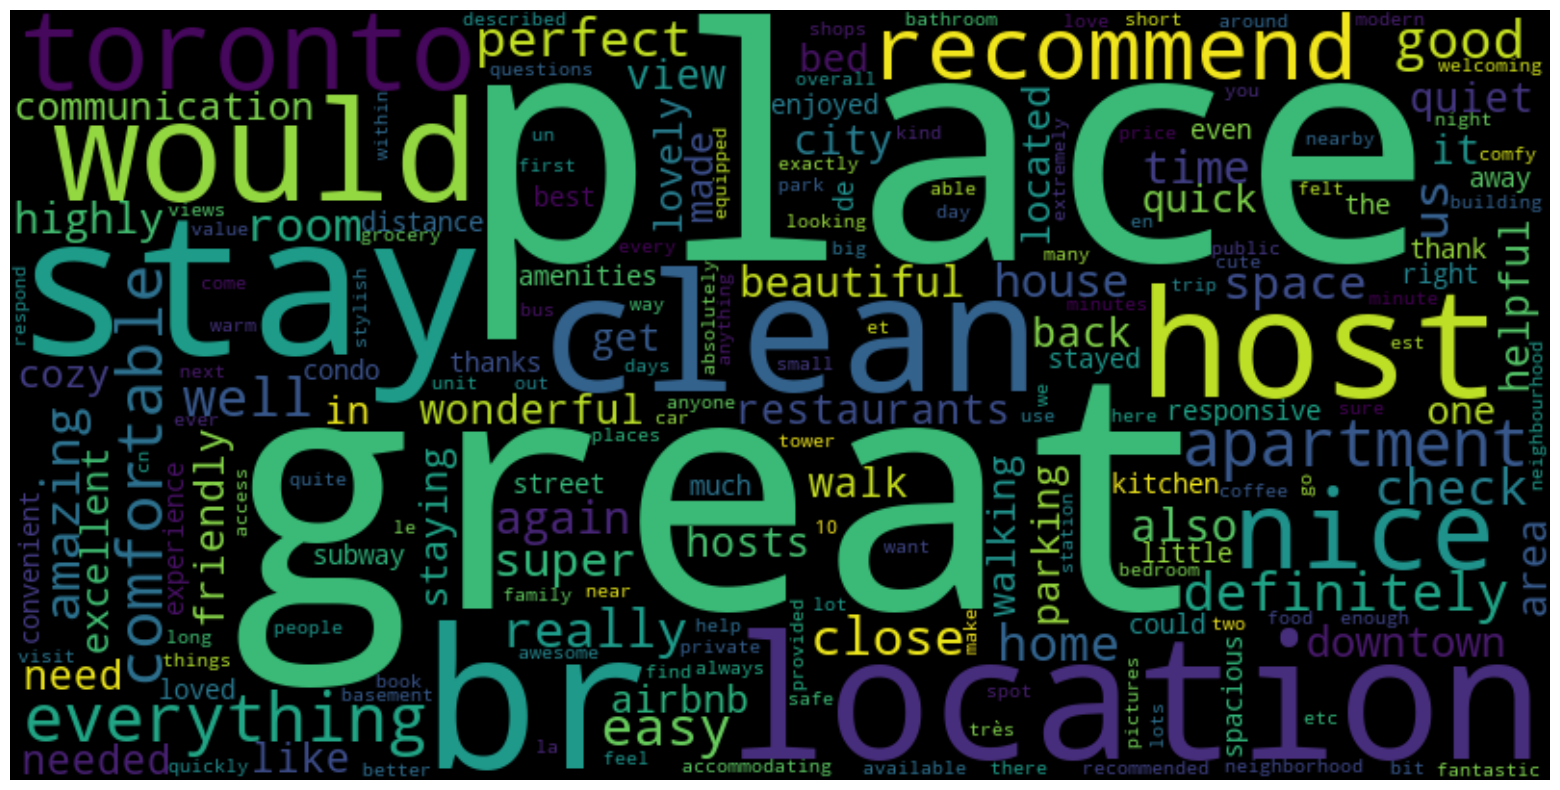

In [72]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Regresión

In [69]:
from pycaret.regression import*

In [70]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'property_type', 'accommodates',
       'first_review', 'review_scores_value', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_accuracy',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_rating', 'maximum_nights', 'listing_url',
       'host_is_superhost', 'host_about', 'host_response_time',
       'host_response_rate', 'District', 'rental_type', 'license_disclosed'],
      dtype='object')

In [71]:
listings['availability_365'].isnull().sum()

0

In [72]:
prueba=listings[['neighbourhood','room_type', 'price', 'minimum_nights','availability_365','accommodates','District', 'rental_type', 'license_disclosed']].copy()

In [73]:
prueba.isnull().sum()

neighbourhood        0
room_type            0
price                0
minimum_nights       0
availability_365     0
accommodates         0
District             0
rental_type          0
license_disclosed    0
dtype: int64

In [ ]:
setup = setup(data = prueba, target = 'price')

In [ ]:
best = compare_models(round=2)

In [ ]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,95.2276,252245.8241,502.2408,0.0435,0.5925,0.4158
1,67.6223,24853.3832,157.6496,0.2301,0.5555,0.4436
2,91.5274,159604.1321,399.5049,0.0546,0.6063,0.4408
3,79.8623,146265.7272,382.4470,0.0324,0.5784,0.4321
4,76.4819,153136.7522,391.3269,0.0317,0.5864,0.4321
5,72.1452,30857.3237,175.6625,0.2084,0.6037,0.4605
6,65.1736,22134.9124,148.7781,0.2116,0.5519,0.4336
7,142.5775,2377492.7681,1541.9120,0.0001,0.6258,0.4209
8,93.0408,124607.9736,352.9985,0.0521,0.5992,0.4235


In [ ]:
tuned_huber = tune_model(huber, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,95.2731,252872.2793,502.8641,0.0411,0.5782,0.4031
1,67.3050,25096.9373,158.4201,0.2225,0.5500,0.4287
2,91.5570,160117.7235,400.1471,0.0515,0.6070,0.4291
3,79.8836,146506.5888,382.7618,0.0308,0.5698,0.4215
4,76.2177,153354.7818,391.6054,0.0304,0.5809,0.4192
5,71.9826,31119.2855,176.4066,0.2017,0.5958,0.4467
6,65.0335,22286.8803,149.2879,0.2061,0.5474,0.4229
7,142.6588,2378308.7023,1542.1766,-0.0002,0.6216,0.4119
8,92.9874,125020.9436,353.5830,0.0490,0.5959,0.4123


Fitting 10 folds for each of 10 candidates, totalling 100 fits


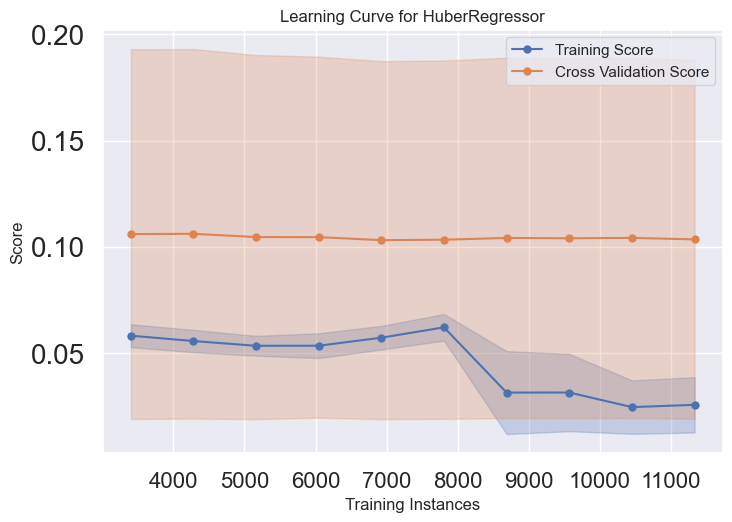

In [ ]:
plot_model(tuned_huber, plot = 'learning')

In [ ]:
finalize_model(tuned_huber)

Pipeline(memory=FastMemory(location=C:\Users\Russhi\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['minimum_nights',
                                             'availability_365',
                                             'accommodates'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['neighbourhood', 'room_type',
                                             'District', 'rental_type',
                                             'license_disclosed'],
                                    transfor...
                                             'license_disclosed'],
                                    transformer=OneHotEncoder(cols=['room_type',
                                                                    'District',
                                                                    'license_disclosed'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['neighbourhood'],
                                    transformer=TargetEncoder(cols=['neighbourhood'],
                                                              handle_missing='return_nan'))),
                ('actual_estimator', HuberRegressor(alpha=0.15, epsilon=1.1))])

In [ ]:
#Salvar
save_model(tuned_huber,'price_prediction_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Russhi\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['minimum_nights',
                                              'availability_365',
                                              'accommodates'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['neighbourhood', 'room_type',
                                              'District', 'rental_type',
                                              'license_disclosed'],
                                     transfor...
                  TransformerWrapper(include=['room_type', 'District',
                                              'license_disclosed'],
                                     transformer=OneHotEncoder(cols=['room_type',
                                                                     'District',
          

In [210]:
room_type = input("'Entire home/apt', 'Private room', 'Shared room', 'Hotel room': ")
accommodates = input("Número mínimo 1, número máximo 16: ")
minimum_nights = float(input("Estancia mínima: "))
availability_365 = float(input("Disponibilidad del host: "))
District = input("Toronto, Scarborough, North York, York, East York, Etobicoke: ")
rental_type = input("'Short-term rental', 'Long-term rental': ")
license_disclosed = input("'No', 'Yes', 'Exempt': ")
neighbourhood = input("Barrio por zona: ")


def prediccion_precios(room_type, accommodates, minimum_nights, availability_365, District, rental_type, license_disclosed, neighbourhood):
    data = pd.DataFrame({'room_type': [room_type],
                         'accommodates': [accommodates],
                         'minimum_nights': [minimum_nights],
                         'availability_365': [availability_365],
                         'District': [District],
                         'rental_type':[rental_type],
                         'license_disclosed': [license_disclosed],
                         'neighbourhood': [neighbourhood]})
    
    loaded_model = load_model('price_prediction_regression')
    prediction = predict_model(loaded_model, data=data)
    
    return prediction

prediccion_precios(room_type, accommodates, minimum_nights, availability_365, District, rental_type, license_disclosed, neighbourhood)


Transformation Pipeline and Model Successfully Loaded


,room_type,accommodates,minimum_nights,availability_365,District,rental_type,license_disclosed,neighbourhood,prediction_label
0,Entire home/apt,2,20.0,365.0,Toronto,Short-term rental,Yes,Roncesvalles,239.532467
